In [1]:

import pandas as pd                                                      #FOR NUMPY
import numpy as np                                                       #FOR PANDAS
import matplotlib.pyplot as plt                                          #FOR PLOTTING
import statistics as stat                                                #FOR STSTISTICS (MEAN, MODE AND MEDIANS) IF REQUIRED
import seaborn as sns                                                    #FOR PLOTTING
from sklearn.preprocessing import MinMaxScaler                           #FOR MIN-MAX SCALEING
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
data = pd.read_excel('/content/iris (1).xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Exploratory analysis**

In [4]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**missing values**

array([[<Axes: title={'center': 'SL'}>, <Axes: title={'center': 'SW'}>],
       [<Axes: title={'center': 'PL'}>, <Axes: title={'center': 'PW'}>]],
      dtype=object)

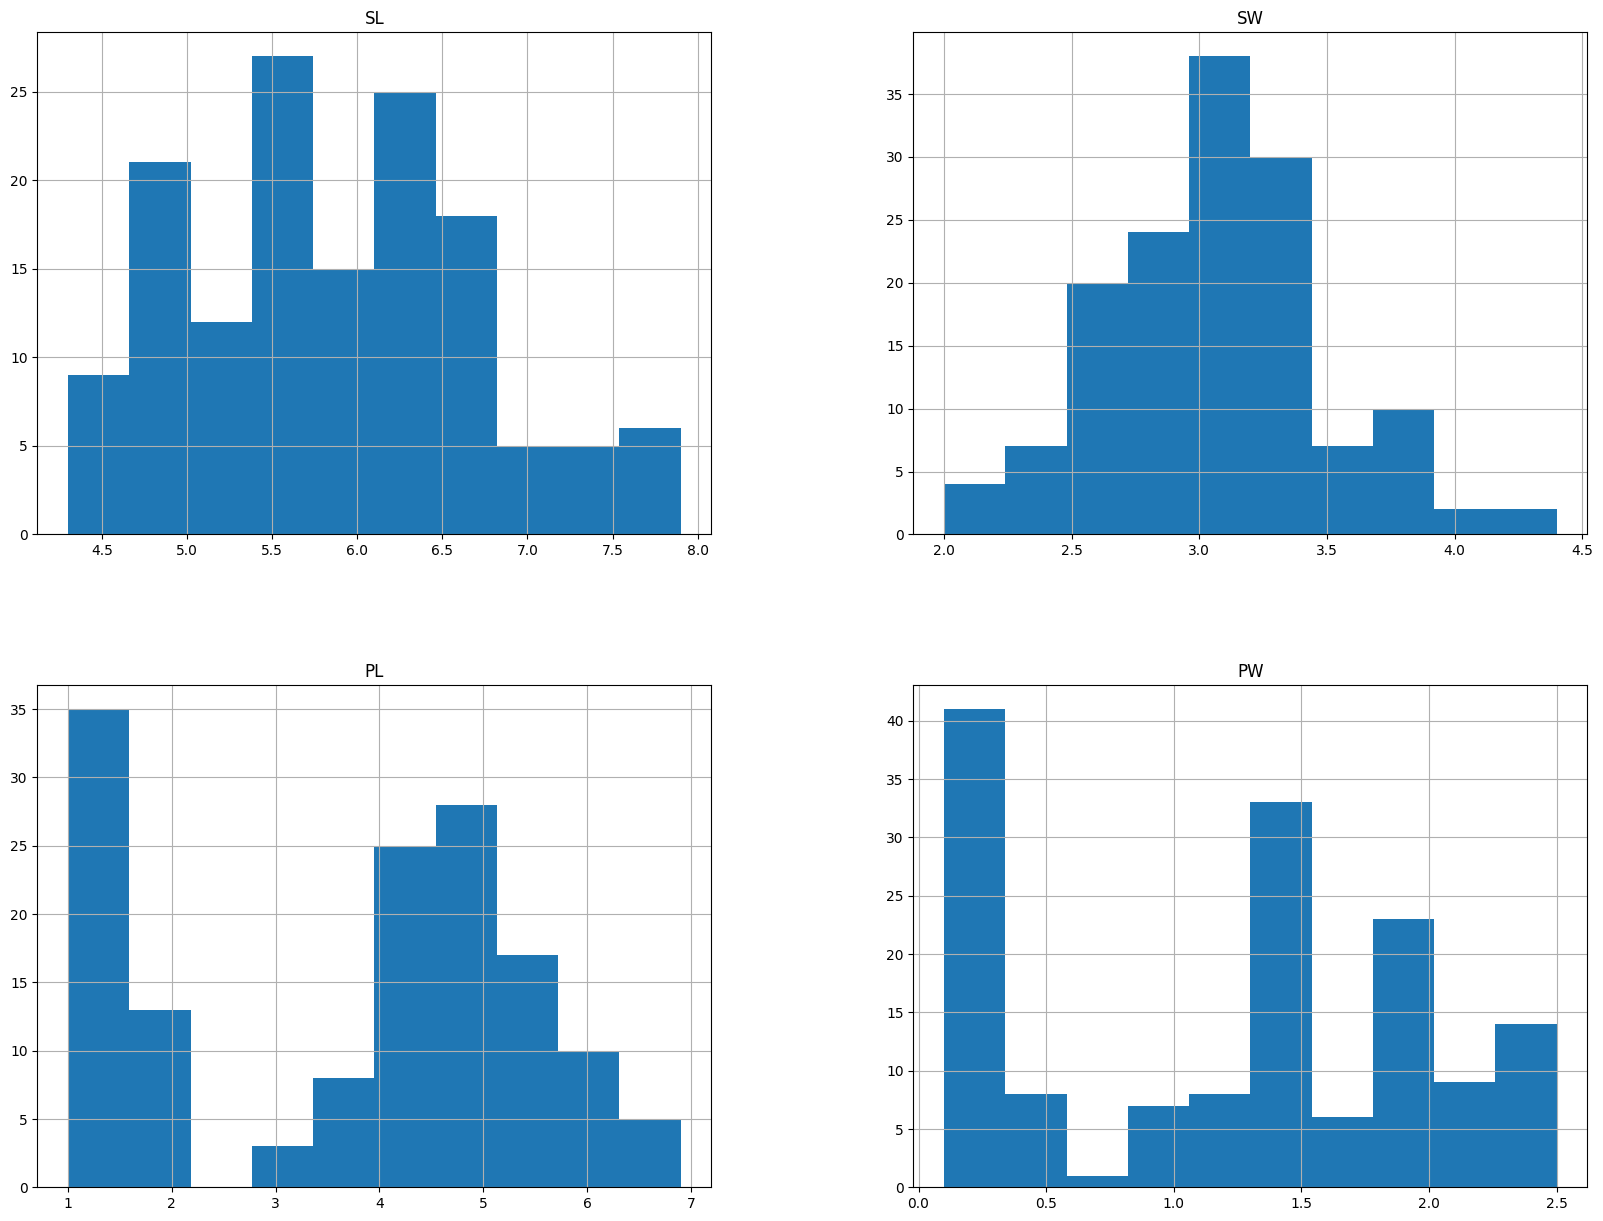

In [9]:
graph=data.select_dtypes(include='float64')
graph.hist(figsize=(20,15))


In [10]:
data['SL'].fillna(data['SL'].median(), inplace=True)            #filling values
data['SW'].fillna(data['SW'].median(), inplace=True)
data['PL'].fillna(data['PL'].median(), inplace=True)

**Outliers**

In [12]:
new_columns = ['SL','SW','PL','PW']

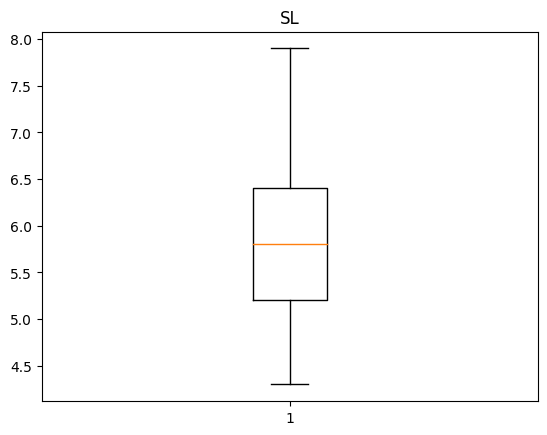

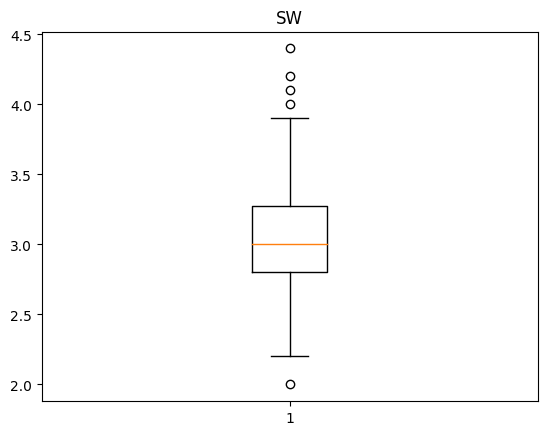

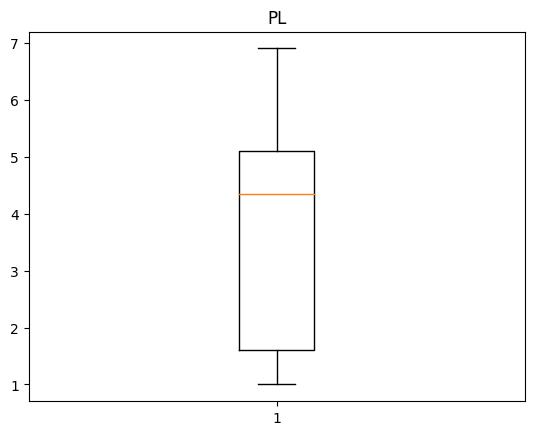

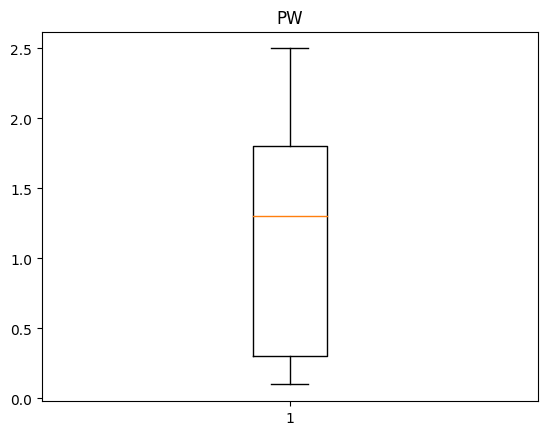

In [13]:
for i in new_columns:
  plt.figure(i)
  plt.boxplot(data[i])
  plt.title(i);

In [16]:
Q1=np.percentile(data['SW'],25,method='midpoint')
Q3=np.percentile(data['SW'],75,method='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
outliers = []
for h in data['SW']:
    if ((h < low_lim) | (h > up_lim)):
      outliers.append(h)
data['SW']=data['SW'].clip(lower=low_lim,upper=up_lim)

**Label encoding**

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])
data.head()


,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**standaed scaling**

In [18]:
X = data[['SL','SW','PL','PW']]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc = pd.DataFrame(X_sc)
X_sc.describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,150.000000,1.500000e+02
mean,-1.894781e-16,-2.605323e-16,0.000000,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350,1.003350e+00
min,-1.927530e+00,-2.282244e+00,-1.612857,-1.444450e+00
25%,-8.107207e-01,-6.013769e-01,-1.264758,-1.181504e+00
50%,-6.618128e-02,-1.033422e-01,0.330694,1.332259e-01
75%,6.783581e-01,5.814555e-01,0.765817,7.905908e-01
max,2.539707e+00,2.200068e+00,1.810113,1.710902e+00


**correlation**

<Axes: >

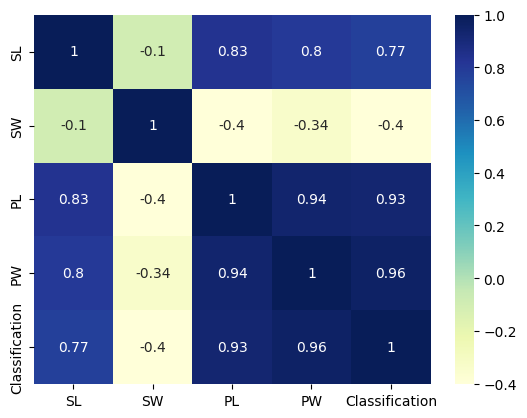

In [19]:

sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)

**Logistic regression**

In [20]:
y = data.Classification
X = data.drop('Classification',axis=True)
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)
log_reg.fit(X_train_sc,y_train)
y_pred=log_reg.predict(X_test_sc)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])

In [22]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_sc, y_train)
logistic_reg_pred = logistic_reg.predict(X_test_sc)
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_pred)
logistic_precision = precision_score(y_test, logistic_reg_pred, average='macro')
logistic_recall = recall_score(y_test, logistic_reg_pred, average='macro')
logistic_f1 = f1_score(y_test, logistic_reg_pred, average='macro')
print("logistic_reg_accuracy:", logistic_reg_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,logistic_reg_pred))
print("precision_score:",logistic_precision)
print("recall_score:",logistic_recall)
print("f1_score:",logistic_f1)

logistic_reg_accuracy: 0.9666666666666667
confusion_matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
precision_score: 0.9666666666666667
recall_score: 0.9696969696969697
f1_score: 0.9665831244778613


**Decision Tree**

In [23]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_sc, y_train)
decision_tree_pred = decision_tree.predict(X_test_sc)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
decision_tree_precision = precision_score(y_test, decision_tree_pred, average='macro')
decision_tree_recall = recall_score(y_test, decision_tree_pred, average='macro')
decision_tree_f1 = f1_score(y_test, decision_tree_pred, average='macro')
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,decision_tree_pred))
print("precision_score:",decision_tree_precision)
print("recall_score:",decision_tree_recall)
print("f1_score:",decision_tree_f1)


Decision Tree Accuracy: 0.9666666666666667
confusion_matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
precision_score: 0.9666666666666667
recall_score: 0.9696969696969697
f1_score: 0.9665831244778613


**random forest**

In [24]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_sc, y_train)
random_forest_pred = random_forest.predict(X_test_sc)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
random_forest_precision = precision_score(y_test, random_forest_pred, average='macro')
random_forest_recall = recall_score(y_test, random_forest_pred, average='macro')
random_forest_f1 = f1_score(y_test, random_forest_pred, average='macro')
print("Random Forest Accuracy:", random_forest_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,random_forest_pred))
print("precision_score:",random_forest_precision)
print("recall_score:",random_forest_recall)
print("f1_score:",random_forest_f1)

Random Forest Accuracy: 0.9666666666666667
confusion_matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
precision_score: 0.9666666666666667
recall_score: 0.9696969696969697
f1_score: 0.9665831244778613


**SVM**

In [25]:
svm = SVC()
svm.fit(X_train_sc, y_train)
svm_pred = svm.predict(X_test_sc)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='macro')
svm_recall = recall_score(y_test, svm_pred, average='macro')
svm_f1 = f1_score(y_test, svm_pred, average='macro')
print("SVM Accuracy:", svm_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,svm_pred))
print("precision_score:",svm_precision)
print("recall_score:",svm_recall)
print("f1_score:",svm_f1)

SVM Accuracy: 0.9666666666666667
confusion_matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
precision_score: 0.9666666666666667
recall_score: 0.9696969696969697
f1_score: 0.9665831244778613


**K-Nearest Neighbors (KNN)**

In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)
knn_pred = knn.predict(X_test_sc)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, average='macro')
knn_recall = recall_score(y_test, knn_pred, average='macro')
knn_f1 = f1_score(y_test, knn_pred, average='macro')
print("KNN Accuracy:", knn_accuracy)
print("confusion_matrix:", confusion_matrix(y_test,knn_pred))
print("precision_score:",knn_precision)
print("recall_score:",knn_recall)
print("f1_score:",knn_f1)

KNN Accuracy: 0.9666666666666667
confusion_matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
precision_score: 0.9666666666666667
recall_score: 0.9696969696969697
f1_score: 0.9665831244778613


HYPER PARAMETER TUNING

In [27]:
rf_clf = RandomForestClassifier(n_estimators=20,max_depth=20,criterion='entropy',min_samples_split=2)
rf_clf.fit(X_train_sc,y_train)
y_pred = rf_clf.predict(X_test_sc)
print('confusion_matrix',confusion_matrix(y_test,y_pred))
print('Accuracy',accuracy_score(y_test,y_pred))
print("precision_score:",precision_score(y_test,y_pred, average='macro'))
print("recall_score:",recall_score(y_test,y_pred, average='macro'))
print("f1_score:",f1_score(y_test,y_pred, average='macro'))


confusion_matrix [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
Accuracy 0.9666666666666667
precision_score: 0.9666666666666667
recall_score: 0.9696969696969697
f1_score: 0.9665831244778613


# **BEST MODEL IS DECISION TREES AS PER THIS DATASET.**